In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/heart_disease3.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,ca,thal,cp,thalach,oldpeak,num
0,0.000000,0.75,0.000000,0.603053,0.370968,0.0
1,1.000000,0.00,1.000000,0.282443,0.241935,1.0
2,0.666667,1.00,1.000000,0.442748,0.419355,1.0
3,0.000000,0.00,0.666667,0.885496,0.564516,0.0
4,0.000000,0.00,0.333333,0.770992,0.225806,0.0
...,...,...,...,...,...,...
292,0.000000,1.00,1.000000,0.396947,0.032258,1.0
293,0.000000,1.00,0.000000,0.465649,0.193548,1.0
294,0.666667,1.00,1.000000,0.534351,0.548387,1.0
295,0.333333,1.00,1.000000,0.335878,0.193548,1.0


In [3]:
X = df.drop(columns=['num'])
y = df['num']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [6]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

with open('../results/evaluation_metrics.txt','w') as f:
    f.write('\t\t\tLogistic Regression Metrics\n\n')
    f.write(classification_report(y_pred_log, y_test) + '\n')
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        36
         1.0       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [7]:
def roc_auc_calc(y_pred, y_test) :
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('AUC Score = ' + str(roc_auc_score(y_pred, y_test)))

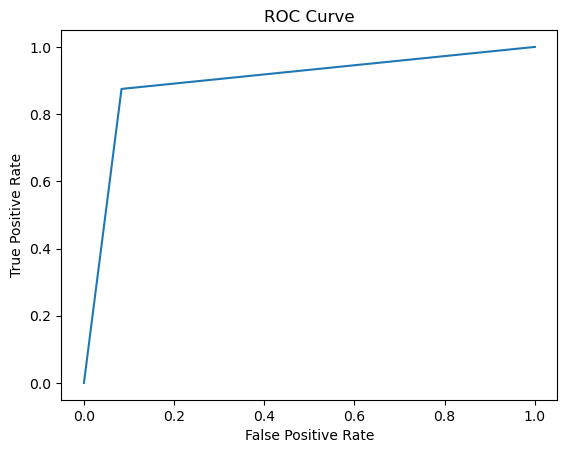

AUC Score = 0.8958333333333334


In [8]:
roc_auc_calc(y_pred_log, y_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [10]:
with open('../results/evaluation_metrics.txt','a') as f:
    f.write('\t\t\tDecision Tree Metrics\n\n')
    f.write(classification_report(y_pred_dtc, y_test) + '\n')

print(classification_report(y_pred_dtc, y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79        32
         1.0       0.79      0.68      0.73        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



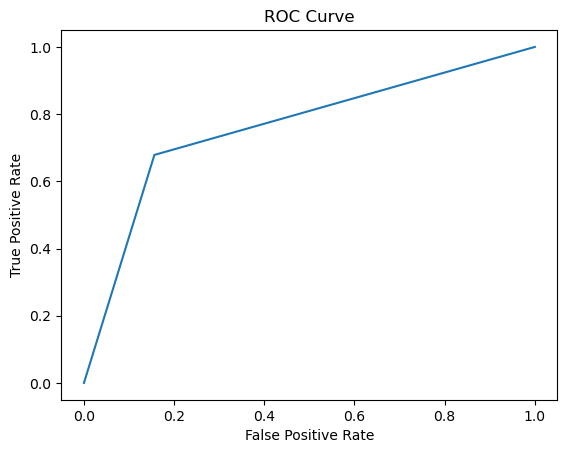

AUC Score = 0.7611607142857143


In [11]:
roc_auc_calc(y_pred_dtc, y_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

In [13]:
with open('../results/evaluation_metrics.txt','a') as f:
    f.write('\t\t\tRandom Forest Metrics\n\n')
    f.write(classification_report(y_pred_rfc, y_test) + '\n')

print(classification_report(y_pred_rfc, y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86        34
         1.0       0.83      0.77      0.80        26

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



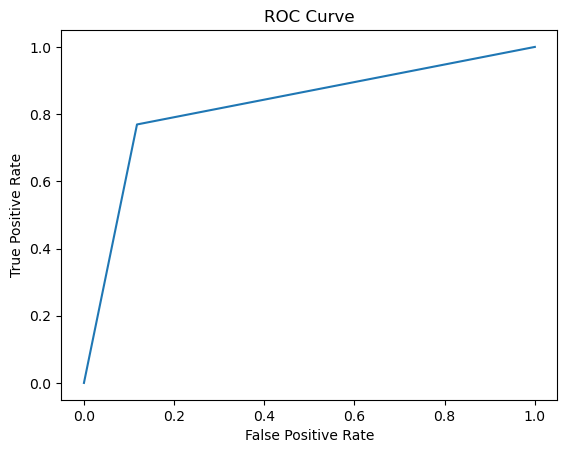

AUC Score = 0.8257918552036198


In [14]:
roc_auc_calc(y_pred_rfc, y_test)

In [15]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [16]:
with open('../results/evaluation_metrics.txt','a') as f:
    f.write('\t\t\tSupport Vector Machines Metrics\n\n')
    f.write(classification_report(y_pred_svm, y_test) + '\n')

print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.83      0.91      0.87        22

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.89        60
weighted avg       0.90      0.90      0.90        60



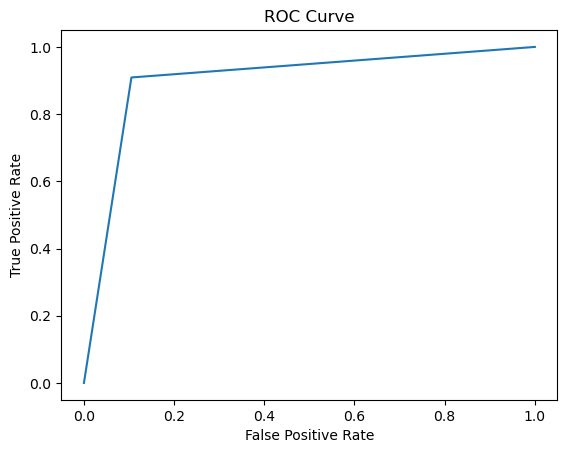

AUC Score = 0.9019138755980862


In [17]:
roc_auc_calc(y_pred_svm, y_test)